In [1]:
!pip install -Uqq fastai 'duckduckgo_search>=6.2'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.3 MB/s eta 0:00:00


In [2]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [13]:
urls = search_images('metapod pokemon', max_images=1)
urls[0]

'https://img.pokemondb.net/artwork/large/metapod.jpg'

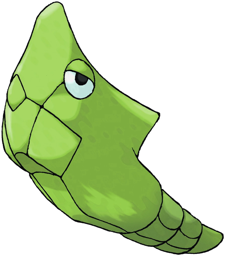

In [14]:
from fastdownload import download_url
dest = 'metapod.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

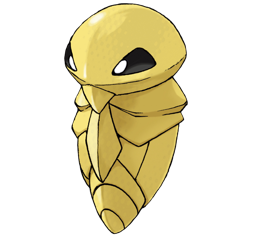

In [16]:
download_url(search_images('kakuna pokemon', max_images=1)[0], 'kakuna.jpg', show_progress=False)
Image.open('kakuna.jpg').to_thumb(256,256)

In [17]:
searches = 'metapod','kakuna'
path = Path('matapod_or_kakuna')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

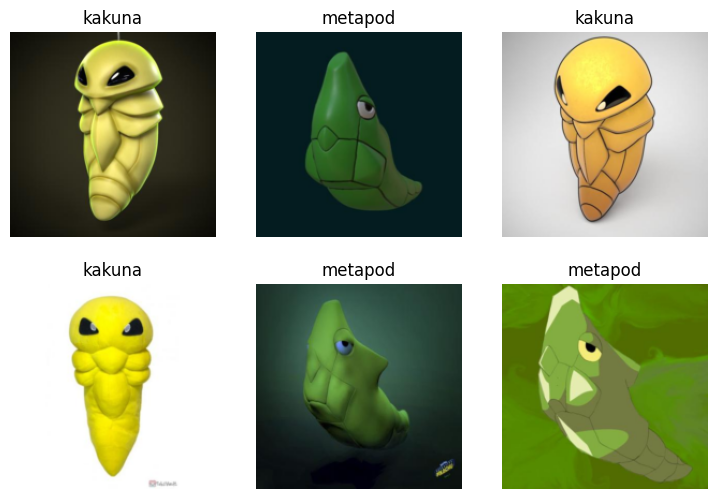

In [19]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [20]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.926142,0.438347,0.196721,00:37


epoch,train_loss,valid_loss,error_rate,time
0,0.232345,0.262259,0.131148,01:00
1,0.158436,0.180467,0.065574,00:57
2,0.107486,0.179249,0.098361,00:55


In [26]:
is_kakuna,_,probs = learn.predict(PILImage.create('kakuna.jpg'))
print(f"This is a: {is_kakuna}.")
print(f"Probability it's a Kakuna: {probs[0]:.4f}")

This is a: kakuna.
Probability it's a Kakuna: 1.0000
